In [ ]:
#First part taken from the pyFAI tutorial
#https://pyfai.readthedocs.io/en/stable/usage/tutorial/Introduction/introduction.html
#####################################################
#Nota: May be used if you are behind a firewall and need to setup a proxy
import os
#os.environ["http_proxy"] = "http://proxy.company.fr:3128"
import time
import numpy
start_time = time.perf_counter()
import pyFAI
from pyFAI.integrator.azimuthal import AzimuthalIntegrator
print("Using pyFAI version", pyFAI.version)
import numpy as np
#initializes the visualization module to work with the jupyter notebook
%matplotlib inline
#Better user experience can be obtained with
# %matplotlib widget
from matplotlib.pyplot import subplots

Using pyFAI version 2025.3.0


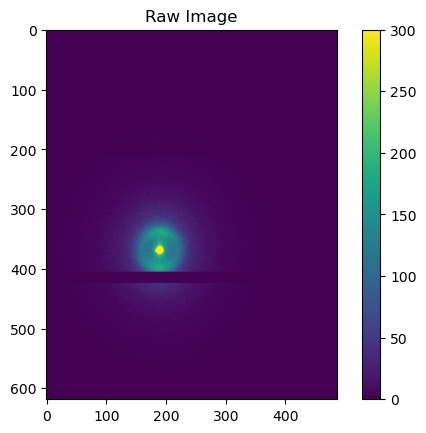

In [21]:
import fabio
from pyFAI.gui import jupyter
import matplotlib.pyplot as plt

# Load the image
img = fabio.open('5CNC0T_raw.tiff').data

# Set the minimum and maximum intensity values
vmin = 0  # minimum intensity value
vmax = 300  # maximum intensity value

# Display the image with specified intensity range
plt.imshow(img, vmin=vmin, vmax=vmax, cmap='viridis')
plt.title("Raw Image")
plt.colorbar()
plt.show()

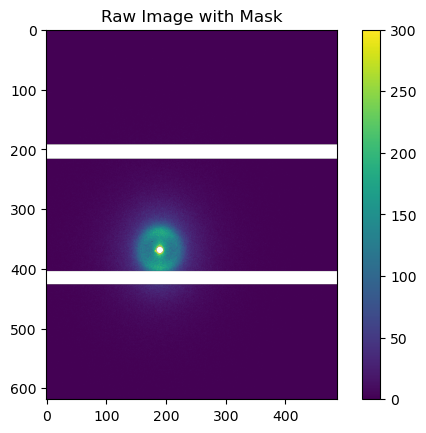

In [ ]:
# Load the mask from an EDF file
# pygdatax_gui was used to draw the mask
mask_file = '5CNCmask.edf'
mask = fabio.open(mask_file).data

# Display the image with the mask applied
vmin = 0  # minimum intensity value
vmax = 300  # maximum intensity value
plt.imshow(np.ma.masked_array(img, mask),vmin=vmin, vmax=vmax, cmap='viridis')

plt.title("Raw Image with Mask")
plt.colorbar()
plt.show()

In [23]:
import pyFAI, pyFAI.detectors


# Use the specific detector class for PILATUS3 300
detector = pyFAI.detectors.Pilatus300k()
detector.mask = mask


# Method 2 to create mask. 
#mask = np.zeros(detector.shape, dtype=bool)
#mask = (img > 300) | (img <0.00010)


# Create an AzimuthalIntegrator with the detector
ai = AzimuthalIntegrator(detector=detector)
ai.wavelength = 1.542e-10  # 1.54 angstroms in meters
ai.setFit2D(1530.4453, 189.783, 368.952)

print(ai)


Detector Pilatus 300k	 PixelSize= 172µm, 172µm	 BottomRight (3)
Wavelength= 1.542000e-10 m
SampleDetDist= 1.530445e+00 m	PONI= 6.345974e-02, 3.264268e-02 m	rot1=0.000000  rot2=0.000000  rot3=0.000000 rad
DirectBeamDist= 1530.445 mm	Center: x=189.783, y=368.952 pix	Tilt= 0.000° tiltPlanRotation= 0.000° 𝛌= 1.542Å


Text(0, 0.5, 'Intensity')

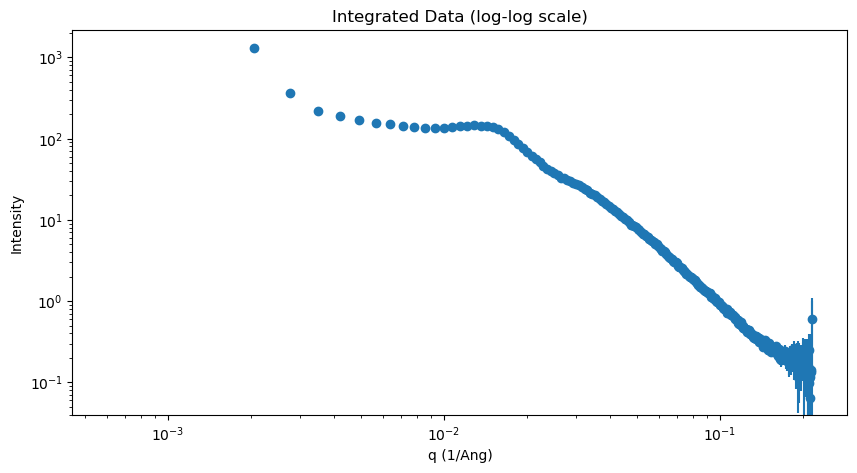

In [28]:
# Integrate with units in inverse angstroms, applying the mask
res= ai.integrate1d_ng(img, 300, unit="q_A^-1", mask=mask, method="cython", error_model="poisson")

# Display the integration result 
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(res.radial, res.intensity, yerr=res.sigma, fmt='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Integrated Data (log-log scale)")
ax.set_xlabel("q (1/Ang)")
ax.set_ylabel("Intensity")


<Axes: title={'center': '2D regrouping'}, xlabel='Scattering vector $q$ ($\\AA^{-1}$)', ylabel='Azimuthal angle $\\chi$ ($^{o}$)'>

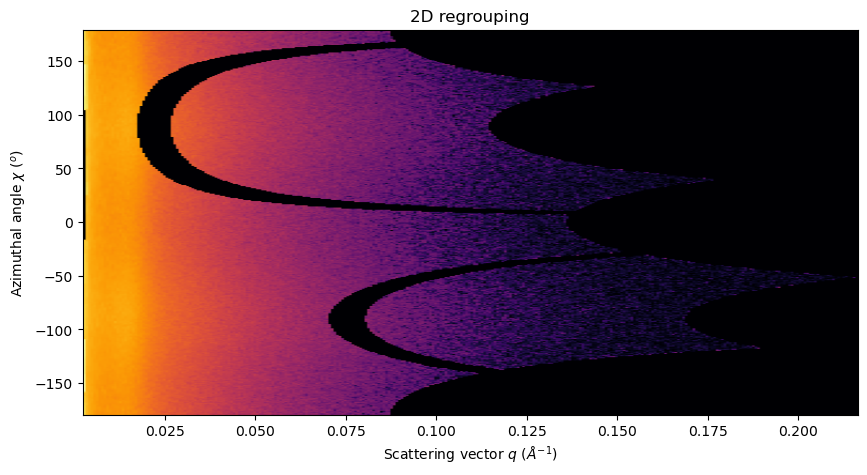

In [25]:
# Integrate with units in inverse angstroms and specified q limits, applying the mask
res= ai.integrate2d_ng(img, 300, unit="q_A^-1", mask=mask)

# Display the integration result 
fig, ax = plt.subplots(figsize=(10, 5))
jupyter.plot2d(res, ax=ax)
